## This contains the code for the experiments on changing parameters (Number of layers, Number of Epochs, and Validation Threshold

In [1]:
#various imports used during the program
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import ROCModule as roc 

num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [4]:
# Reshaping the dataframes to allow them to be stitched together, randomised and then split apart into training and testing
# sets
y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [5]:
# Creating 10 bins for output
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [6]:
# defining the base model
model = Sequential()

In [7]:
model.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model.add(Dense(512, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [9]:
# summary of the base model showing its layers, types of layer and node number
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
#training the base model
Base_Model = model.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 3s 271us/step - loss: 0.8350 - accuracy: 0.7355 - val_loss: 0.6657 - val_accuracy: 0.7765
Epoch 2/20
12660/12660 [==============================] - 3s 245us/step - loss: 0.3747 - accuracy: 0.8743 - val_loss: 0.5485 - val_accuracy: 0.8285
Epoch 3/20
12660/12660 [==============================] - 3s 245us/step - loss: 0.2802 - accuracy: 0.9123 - val_loss: 0.5969 - val_accuracy: 0.8398
Epoch 4/20
12660/12660 [==============================] - 3s 245us/step - loss: 0.2125 - accuracy: 0.9317 - val_loss: 0.6019 - val_accuracy: 0.8484
Epoch 5/20
12660/12660 [==============================] - 3s 246us/step - loss: 0.2033 - accuracy: 0.9318 - val_loss: 0.6217 - val_accuracy: 0.8715
Epoch 6/20
12660/12660 [==============================] - 3s 259us/step - loss: 0.1789 - accuracy: 0.9373 - val_loss: 0.4056 - val_accuracy: 0.8770
Epoch 7/20
12660/12660 [==============================] - 3s 24

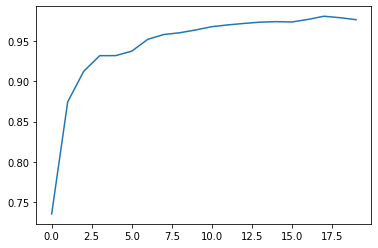

In [11]:
#accuracy of base model by Epoch number
plt.plot(Base_Model.history['accuracy'])

Text(0, 0.5, 'Accuracy')

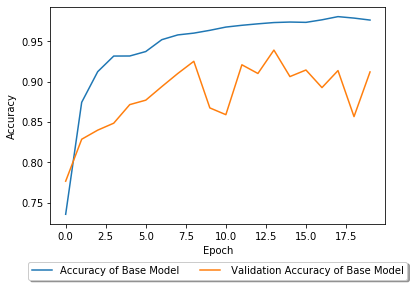

In [12]:
plt.plot(Base_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(Base_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [13]:
# Evaluate function returns the Loss and Accuracy of the FINAL model returned after the last Epoch rather than the best model discovered during the training
score = model.evaluate(x_test, y_test) 

4170/4170 [==============================] - 0s 95us/step


In [102]:
print(model.metrics_names)

['loss', 'accuracy']


In [14]:
# score is made up of the loss and accuracy in the model. Loss is defined by 
score 

[0.44743989721047794, 0.9119904041290283]

In [15]:
# have the trained model predict the test set (needed to create heat maps and classification reports)
predictions = model.predict_classes(x_test, batch_size=10)

In [16]:
rounded_labels=np.argmax(y_test, axis=1)

In [17]:
cm = confusion_matrix(rounded_labels, predictions)

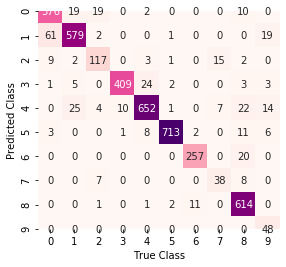

In [18]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [19]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       450
           1       0.87      0.92      0.90       630
           2       0.79      0.78      0.78       150
           3       0.91      0.97      0.94       420
           4       0.89      0.94      0.92       690
           5       0.96      0.99      0.97       720
           6       0.93      0.95      0.94       270
           7       0.72      0.63      0.67        60
           8       0.98      0.89      0.93       690
           9       1.00      0.53      0.70        90

    accuracy                           0.91      4170
   macro avg       0.89      0.85      0.86      4170
weighted avg       0.91      0.91      0.91      4170



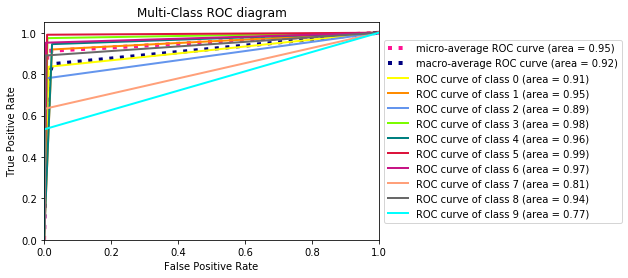

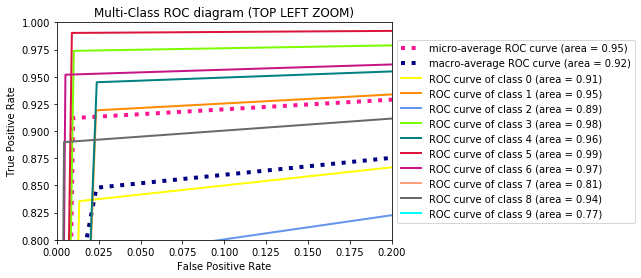

In [20]:
# plot ROC the curve
roc.plotROC(y_test,predictions)

# Changing Layers

## Double the layers

In [21]:
#Create a model with double the layers. All further commands mirror those above resulting in a graph of accuracy by epoch, heat maps and classificaiton reports which can be directly compared with the above
model1 = Sequential()

In [22]:
model1.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model1.add(Dense(512, activation = 'relu'))

# Layer 3
model1.add(Dense(512, activation = 'relu'))

# Layer 4
model1.add(Dense(512, activation = 'relu'))

#Output Layer
model1.add(Dense(10, activation = 'softmax'))

In [23]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


In [25]:
DoubleLayer = model1.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 6s 443us/step - loss: 0.8430 - accuracy: 0.7168 - val_loss: 0.7397 - val_accuracy: 0.7624
Epoch 2/20
12660/12660 [==============================] - 5s 415us/step - loss: 0.3889 - accuracy: 0.8615 - val_loss: 0.6938 - val_accuracy: 0.7643
Epoch 3/20
12660/12660 [==============================] - 5s 428us/step - loss: 0.3013 - accuracy: 0.8933 - val_loss: 0.4911 - val_accuracy: 0.8369
Epoch 4/20
12660/12660 [==============================] - 5s 419us/step - loss: 0.2726 - accuracy: 0.9082 - val_loss: 0.4943 - val_accuracy: 0.8489
Epoch 5/20
12660/12660 [==============================] - 5s 412us/step - loss: 0.1842 - accuracy: 0.9338 - val_loss: 0.3784 - val_accuracy: 0.9000
Epoch 6/20
12660/12660 [==============================] - 5s 429us/step - loss: 0.1702 - accuracy: 0.9388 - val_loss: 0.3658 - val_accuracy: 0.8952
Epoch 7/20
12660/12660 [==============================] - 5s 41

In [109]:
# Evaluate function returns the Loss and Accuracy of the FINAL model returned after the last Epoch rather than the best model discovered during the training
score = model1.evaluate(x_test, y_test) 

4170/4170 [==============================] - 0s 110us/step


In [110]:
score

[0.4051047233047245, 0.9167865514755249]

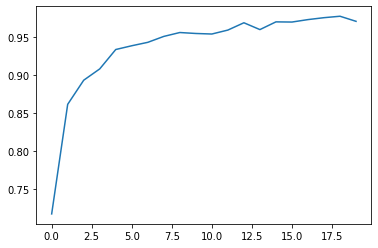

In [26]:
plt.plot(DoubleLayer.history['accuracy'])

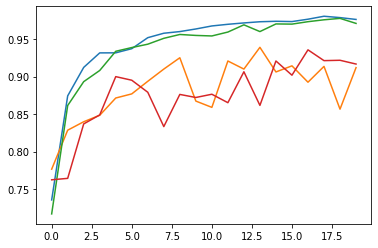

In [27]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])
plt.plot(DoubleLayer.history['accuracy'])
plt.plot(DoubleLayer.history['val_accuracy'])

In [28]:
score = model1.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 105us/step


In [29]:
score

[0.4051047233047245, 0.9167865514755249]

In [30]:
# have the trained model predict the test set (needed to create heat maps and classification reports)
predictions = model1.predict_classes(x_test, batch_size=10)

In [31]:
cm = confusion_matrix(rounded_labels, predictions)

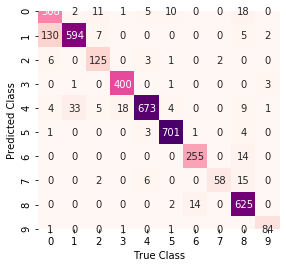

In [32]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [33]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.87      0.68      0.77       450
           1       0.80      0.94      0.87       630
           2       0.91      0.83      0.87       150
           3       0.99      0.95      0.97       420
           4       0.90      0.98      0.94       690
           5       0.99      0.97      0.98       720
           6       0.95      0.94      0.95       270
           7       0.72      0.97      0.82        60
           8       0.98      0.91      0.94       690
           9       0.97      0.93      0.95        90

    accuracy                           0.92      4170
   macro avg       0.91      0.91      0.90      4170
weighted avg       0.92      0.92      0.92      4170



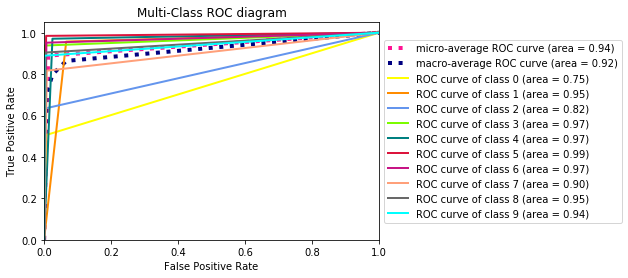

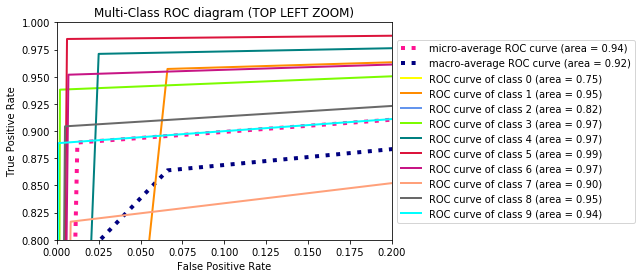

In [92]:
# plot ROC the curve
roc.plotROC(y_test,predictions)

## Half the Layers

In [34]:
#Create a model with half the layers. All further commands mirror those above resulting in a graph of accuracy by epoch, heat maps and classificaiton reports which can be directly compared with the above
model2 = Sequential()

In [35]:
model2.add(Dense(512, activation = 'relu',input_shape=(784,)))

#Output Layer
model2.add(Dense(10, activation = 'softmax'))

In [36]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [37]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [38]:
OneLayer = model2.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 2s 184us/step - loss: 0.9855 - accuracy: 0.7171 - val_loss: 0.7068 - val_accuracy: 0.7791
Epoch 2/20
12660/12660 [==============================] - 2s 164us/step - loss: 0.4490 - accuracy: 0.8720 - val_loss: 0.7744 - val_accuracy: 0.7823
Epoch 3/20
12660/12660 [==============================] - 2s 163us/step - loss: 0.3534 - accuracy: 0.8976 - val_loss: 0.4669 - val_accuracy: 0.8664
Epoch 4/20
12660/12660 [==============================] - 2s 165us/step - loss: 0.2719 - accuracy: 0.9216 - val_loss: 0.4172 - val_accuracy: 0.8926
Epoch 5/20
12660/12660 [==============================] - 2s 163us/step - loss: 0.2413 - accuracy: 0.9318 - val_loss: 0.3951 - val_accuracy: 0.8770
Epoch 6/20
12660/12660 [==============================] - 2s 166us/step - loss: 0.1925 - accuracy: 0.9471 - val_loss: 0.3866 - val_accuracy: 0.8873
Epoch 7/20
12660/12660 [==============================] - 2s 16

In [107]:
# Evaluate function returns the Loss and Accuracy of the FINAL model returned after the last Epoch rather than the best model discovered during the training
score = model2.evaluate(x_test, y_test) 

4170/4170 [==============================] - 0s 53us/step


In [108]:
score

[0.4616884215719265, 0.9124700427055359]

Text(0, 0.5, 'Accuracy')

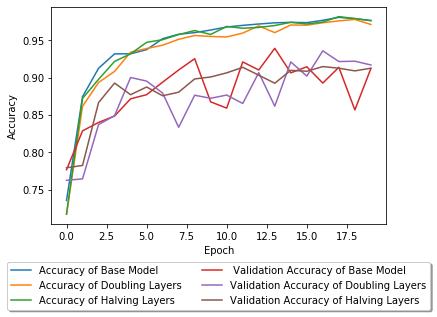

In [39]:
plt.plot(Base_Model.history['accuracy'], label='Accuracy of Base Model')
plt.plot(DoubleLayer.history['accuracy'], label='Accuracy of Doubling Layers')
plt.plot(OneLayer.history['accuracy'], label='Accuracy of Halving Layers')
plt.plot(Base_Model.history['val_accuracy'], label=' Validation Accuracy of Base Model')
plt.plot(DoubleLayer.history['val_accuracy'], label='Validation Accuracy of Doubling Layers')
plt.plot(OneLayer.history['val_accuracy'], label='Validation Accuracy of Halving Layers')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')



In [40]:
score = model2.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 48us/step


In [41]:
score

[0.4616884215719265, 0.9124700427055359]

In [42]:
# have the trained model predict the test set (needed to create heat maps and classification reports)
predictions = model2.predict_classes(x_test, batch_size=10)

In [43]:
cm = confusion_matrix(rounded_labels, predictions)

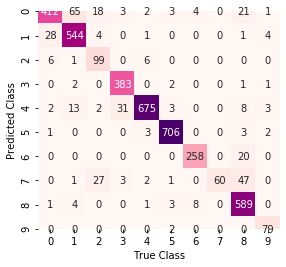

In [44]:
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class');

In [45]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       450
           1       0.93      0.86      0.90       630
           2       0.88      0.66      0.76       150
           3       0.98      0.91      0.95       420
           4       0.92      0.98      0.95       690
           5       0.99      0.98      0.98       720
           6       0.93      0.96      0.94       270
           7       0.43      1.00      0.60        60
           8       0.97      0.85      0.91       690
           9       0.98      0.88      0.92        90

    accuracy                           0.91      4170
   macro avg       0.88      0.90      0.87      4170
weighted avg       0.93      0.91      0.92      4170



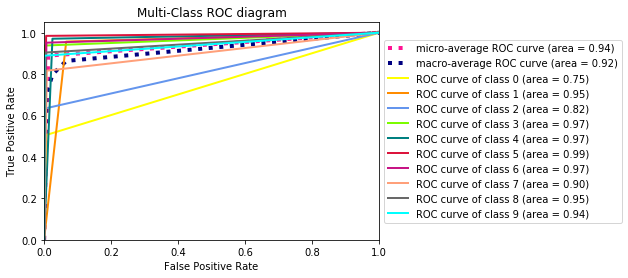

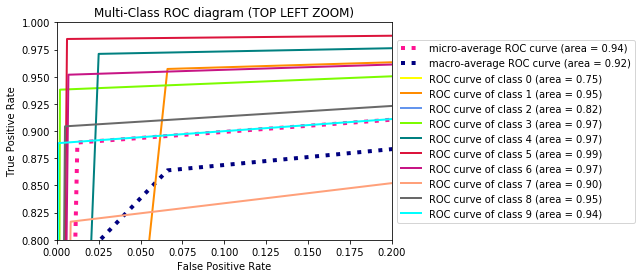

In [93]:
# plot ROC the curve
roc.plotROC(y_test,predictions)

# Changing Epochs

## Half Epochs

In [46]:
#Create a model with half the Epochs. All further commands mirror those above resulting in a graph of accuracy by epoch, heat maps and classificaiton reports which can be directly compared with the above
model3 = Sequential()

In [47]:
model3.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model3.add(Dense(512, activation = 'relu'))

#Output Layer
model3.add(Dense(10, activation = 'softmax'))

In [48]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [49]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [50]:
HalfEpochs = model3.fit(x_train,y_train, epochs = 10, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/10
12660/12660 [==============================] - 3s 268us/step - loss: 0.8423 - accuracy: 0.7337 - val_loss: 0.7403 - val_accuracy: 0.7619
Epoch 2/10
12660/12660 [==============================] - 3s 251us/step - loss: 0.3982 - accuracy: 0.8692 - val_loss: 0.4504 - val_accuracy: 0.8525
Epoch 3/10
12660/12660 [==============================] - 3s 252us/step - loss: 0.2798 - accuracy: 0.9096 - val_loss: 0.4729 - val_accuracy: 0.8794
Epoch 4/10
12660/12660 [==============================] - 3s 247us/step - loss: 0.2392 - accuracy: 0.9241 - val_loss: 0.5214 - val_accuracy: 0.8573
Epoch 5/10
12660/12660 [==============================] - 3s 247us/step - loss: 0.1912 - accuracy: 0.9365 - val_loss: 0.5132 - val_accuracy: 0.8705
Epoch 6/10
12660/12660 [==============================] - 3s 252us/step - loss: 0.1710 - accuracy: 0.9445 - val_loss: 0.4749 - val_accuracy: 0.8880
Epoch 7/10
12660/12660 [==============================] - 3s 26

In [111]:
# Evaluate function returns the Loss and Accuracy of the FINAL model returned after the last Epoch rather than the best model discovered during the training
score = model3.evaluate(x_test, y_test) 

4170/4170 [==============================] - 0s 77us/step


In [112]:
score

[0.39878075391911777, 0.9129496216773987]

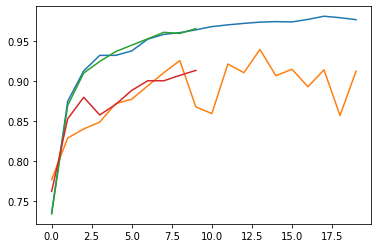

In [51]:
plt.plot(Base_Model.history['accuracy'])
plt.plot(Base_Model.history['val_accuracy'])
plt.plot(HalfEpochs.history['accuracy'])
plt.plot(HalfEpochs.history['val_accuracy'])

In [52]:
score = model3.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 70us/step


In [53]:
score

[0.39878075391911777, 0.9129496216773987]

(0, 10.0)

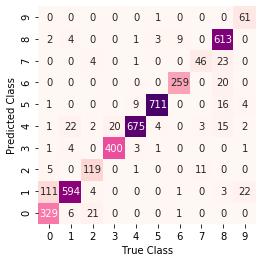

In [54]:
# have the trained model predict the test set (needed to create heat maps and classification reports)
predictions = model3.predict_classes(x_test, batch_size=10)
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
axes = plt.gca()
axes.set_ylim([0,10.0])

In [55]:
print(classification_report(rounded_labels,predictions))


              precision    recall  f1-score   support

           0       0.92      0.73      0.82       450
           1       0.81      0.94      0.87       630
           2       0.88      0.79      0.83       150
           3       0.98      0.95      0.96       420
           4       0.91      0.98      0.94       690
           5       0.96      0.99      0.97       720
           6       0.93      0.96      0.94       270
           7       0.62      0.77      0.69        60
           8       0.97      0.89      0.93       690
           9       0.98      0.68      0.80        90

    accuracy                           0.91      4170
   macro avg       0.90      0.87      0.88      4170
weighted avg       0.92      0.91      0.91      4170



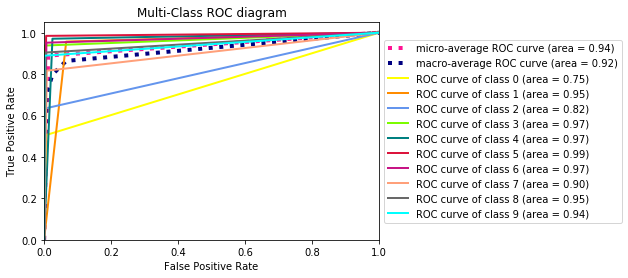

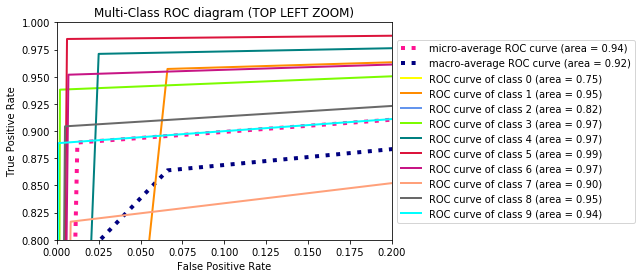

In [94]:
# plot ROC the curve
roc.plotROC(y_test,predictions)

# Double Epochs

In [56]:
#Create a model with double the epochs. All further commands mirror those above resulting in a graph of accuracy by epoch, heat maps and classificaiton reports which can be directly compared with the above
model5 = Sequential()

In [57]:
model5.add(Dense(512, activation='relu', input_shape=(784,)))
model5.add(Dense(512, activation='relu'))
model5.add(Dense(10, activation='softmax'))


In [58]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [60]:
DoubleEpochs = model5.fit(x_train,y_train,epochs=40,validation_data=(x_test,y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/40
12660/12660 [==============================] - 4s 283us/step - loss: 0.8169 - accuracy: 0.7420 - val_loss: 0.6664 - val_accuracy: 0.7890
Epoch 2/40
12660/12660 [==============================] - 3s 245us/step - loss: 0.3739 - accuracy: 0.8750 - val_loss: 0.7563 - val_accuracy: 0.7947
Epoch 3/40
12660/12660 [==============================] - 3s 247us/step - loss: 0.2809 - accuracy: 0.9122 - val_loss: 0.5825 - val_accuracy: 0.8329
Epoch 4/40
12660/12660 [==============================] - 3s 248us/step - loss: 0.2259 - accuracy: 0.9299 - val_loss: 0.4483 - val_accuracy: 0.8715
Epoch 5/40
12660/12660 [==============================] - 3s 248us/step - loss: 0.1934 - accuracy: 0.9390 - val_loss: 0.3552 - val_accuracy: 0.9122
Epoch 6/40
12660/12660 [==============================] - 3s 261us/step - loss: 0.1718 - accuracy: 0.9423 - val_loss: 0.4413 - val_accuracy: 0.8904
Epoch 7/40
12660/12660 [==============================] - 3s 24

In [113]:
# Evaluate function returns the Loss and Accuracy of the FINAL model returned after the last Epoch rather than the best model discovered during the training
score = model5.evaluate(x_test, y_test) 

4170/4170 [==============================] - 0s 76us/step


In [114]:
score

[0.3997579438429844, 0.9410071969032288]

Text(0, 0.5, 'Accuracy')

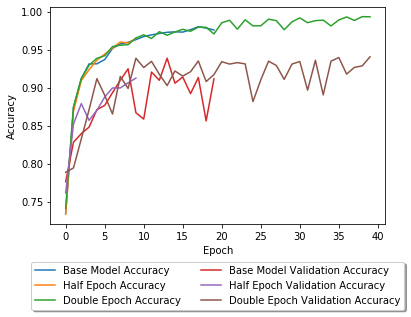

In [61]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(HalfEpochs.history['accuracy'], label='Half Epoch Accuracy')
plt.plot(DoubleEpochs.history['accuracy'], label='Double Epoch Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(HalfEpochs.history['val_accuracy'], label='Half Epoch Validation Accuracy')
plt.plot(DoubleEpochs.history['val_accuracy'], label='Double Epoch Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [62]:
score = model5.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 75us/step


In [63]:
score

[0.3997579438429844, 0.9410071969032288]

Text(79.60000000000001, 0.5, 'Predicted Class')

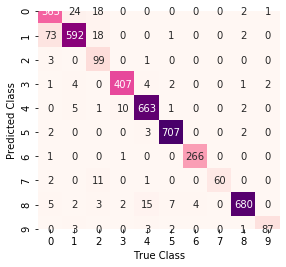

In [64]:
# have the trained model predict the test set (needed to create heat maps and classification reports)
predictions = model5.predict_classes(x_test, batch_size=10)
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [65]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       450
           1       0.86      0.94      0.90       630
           2       0.96      0.66      0.78       150
           3       0.97      0.97      0.97       420
           4       0.97      0.96      0.97       690
           5       0.99      0.98      0.99       720
           6       0.99      0.99      0.99       270
           7       0.81      1.00      0.90        60
           8       0.95      0.99      0.97       690
           9       0.91      0.97      0.94        90

    accuracy                           0.94      4170
   macro avg       0.93      0.93      0.92      4170
weighted avg       0.94      0.94      0.94      4170



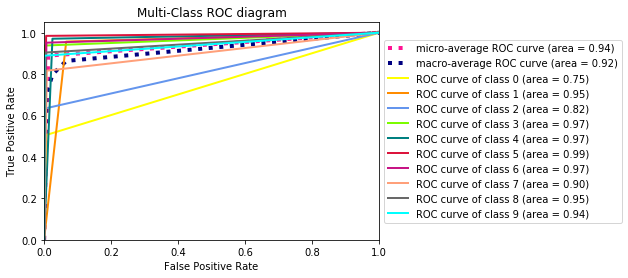

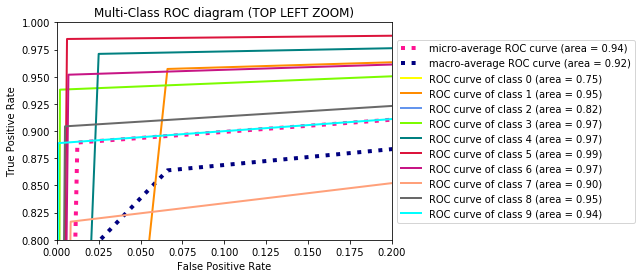

In [95]:
# plot ROC the curve
roc.plotROC(y_test,predictions)

In [66]:
model6 = Sequential()

In [67]:
model6.add(Dense(512, activation='relu', input_shape=(784,)))
model6.add(Dense(512, activation='relu'))
model6.add(Dense(10, activation='softmax'))

In [68]:
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [69]:
model6.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [70]:
FiveEpochs = model6.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/5
12660/12660 [==============================] - 4s 285us/step - loss: 0.8280 - accuracy: 0.7393 - val_loss: 0.5578 - val_accuracy: 0.8031
Epoch 2/5
12660/12660 [==============================] - 3s 248us/step - loss: 0.3843 - accuracy: 0.8741 - val_loss: 0.6769 - val_accuracy: 0.7923
Epoch 3/5
12660/12660 [==============================] - 3s 245us/step - loss: 0.2643 - accuracy: 0.9126 - val_loss: 0.5107 - val_accuracy: 0.8652
Epoch 4/5
12660/12660 [==============================] - 3s 250us/step - loss: 0.2311 - accuracy: 0.9239 - val_loss: 0.4321 - val_accuracy: 0.8871
Epoch 5/5
12660/12660 [==============================] - 3s 250us/step - loss: 0.2113 - accuracy: 0.9329 - val_loss: 0.3318 - val_accuracy: 0.9082


In [115]:
# Evaluate function returns the Loss and Accuracy of the FINAL model returned after the last Epoch rather than the best model discovered during the training
score = model6.evaluate(x_test, y_test) 

4170/4170 [==============================] - 0s 71us/step


In [116]:
score

[0.3318316174353913, 0.9081534743309021]

Text(0, 0.5, 'Accuracy')

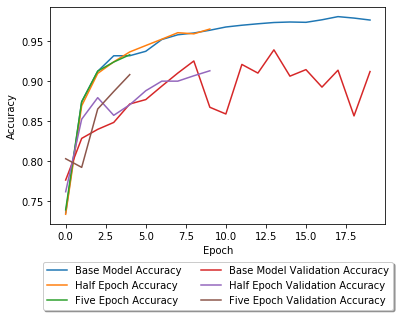

In [71]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(HalfEpochs.history['accuracy'], label='Half Epoch Accuracy')
plt.plot(FiveEpochs.history['accuracy'], label='Five Epoch Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(HalfEpochs.history['val_accuracy'], label='Half Epoch Validation Accuracy')
plt.plot(FiveEpochs.history['val_accuracy'], label='Five Epoch Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(79.60000000000001, 0.5, 'Predicted Class')

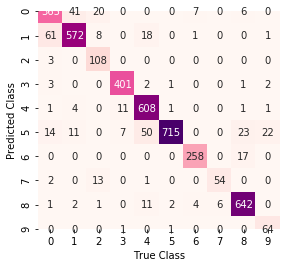

In [96]:
# have the trained model predict the test set (needed to create heat maps and classification reports)
predictions = model6.predict_classes(x_test, batch_size=10)
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [97]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       450
           1       0.87      0.91      0.89       630
           2       0.97      0.72      0.83       150
           3       0.98      0.95      0.97       420
           4       0.97      0.88      0.92       690
           5       0.85      0.99      0.92       720
           6       0.94      0.96      0.95       270
           7       0.77      0.90      0.83        60
           8       0.96      0.93      0.94       690
           9       0.97      0.71      0.82        90

    accuracy                           0.91      4170
   macro avg       0.91      0.88      0.89      4170
weighted avg       0.91      0.91      0.91      4170



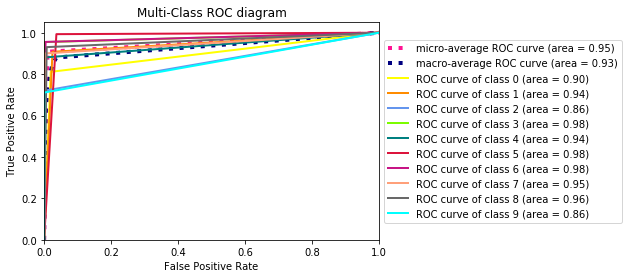

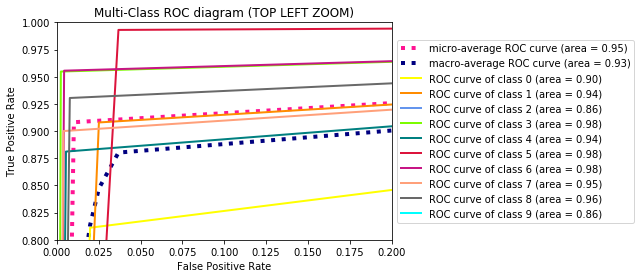

In [98]:
# plot ROC the curve
roc.plotROC(y_test,predictions)

# Validation Threshold

We created a validation threshold using the Keras facility of early stopping. This allows us to set various callbacks. These callbacks are run at the end of each Epoch of training and allow us to control the training in real time. For our experiment we selected the change in validation accuracy as our callback. This means that at the end of each Epoch the model measures the difference in validation accuracy and if it is below a certain threshold the model will cease training. 

## 0.01% Validation Accuracy

In [72]:
#import early stopping to allow for creation of validation threshold
from keras.callbacks import EarlyStopping

In [73]:
model8 = Sequential()

In [74]:
model8.add(Dense(512, activation='relu', input_shape=(784,)))
model8.add(Dense(512, activation='relu'))
model8.add(Dense(10, activation='softmax'))

In [75]:
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.0001)

In [76]:
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

In [77]:
model8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [78]:
Activation1 = model8.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test), callbacks=[es])

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 3s 272us/step - loss: 0.8274 - accuracy: 0.7363 - val_loss: 0.6519 - val_accuracy: 0.7974
Epoch 2/20
12660/12660 [==============================] - 3s 248us/step - loss: 0.3440 - accuracy: 0.8897 - val_loss: 0.5947 - val_accuracy: 0.8113
Epoch 3/20
12660/12660 [==============================] - 3s 249us/step - loss: 0.2738 - accuracy: 0.9129 - val_loss: 0.4962 - val_accuracy: 0.8758
Epoch 4/20
12660/12660 [==============================] - 3s 249us/step - loss: 0.2245 - accuracy: 0.9251 - val_loss: 0.3860 - val_accuracy: 0.9036
Epoch 5/20
12660/12660 [==============================] - 3s 264us/step - loss: 0.1890 - accuracy: 0.9367 - val_loss: 0.3600 - val_accuracy: 0.9153
Epoch 6/20
12660/12660 [==============================] - 3s 251us/step - loss: 0.1970 - accuracy: 0.9355 - val_loss: 0.4627 - val_accuracy: 0.8856


In [117]:
# Evaluate function returns the Loss and Accuracy of the FINAL model returned after the last Epoch rather than the best model discovered during the training
score = model8.evaluate(x_test, y_test) 

4170/4170 [==============================] - 0s 68us/step


In [118]:
score

[0.4627239750193463, 0.8856115341186523]

Text(0, 0.5, 'Accuracy')

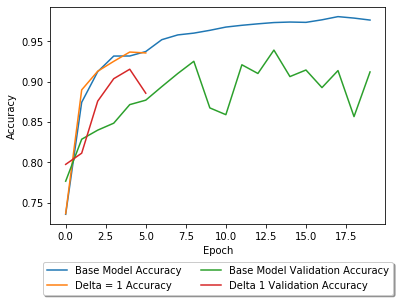

In [79]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(Activation1.history['accuracy'], label='Delta = 1 Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(Activation1.history['val_accuracy'], label='Delta 1 Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [80]:
# have the trained model predict the test set (needed to create heat maps and classification reports)
predictions = model8.predict_classes(x_test, batch_size=10)

Text(79.60000000000001, 0.5, 'Predicted Class')

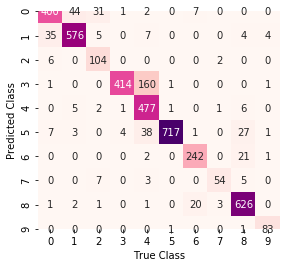

In [81]:
cm = confusion_matrix(rounded_labels, predictions)
sns.heatmap(cm.T, square=True, annot=True,cmap="RdPu", fmt='.0f', cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')

In [82]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       450
           1       0.91      0.91      0.91       630
           2       0.93      0.69      0.79       150
           3       0.72      0.99      0.83       420
           4       0.97      0.69      0.81       690
           5       0.90      1.00      0.94       720
           6       0.91      0.90      0.90       270
           7       0.78      0.90      0.84        60
           8       0.96      0.91      0.93       690
           9       0.98      0.92      0.95        90

    accuracy                           0.89      4170
   macro avg       0.89      0.88      0.88      4170
weighted avg       0.90      0.89      0.88      4170



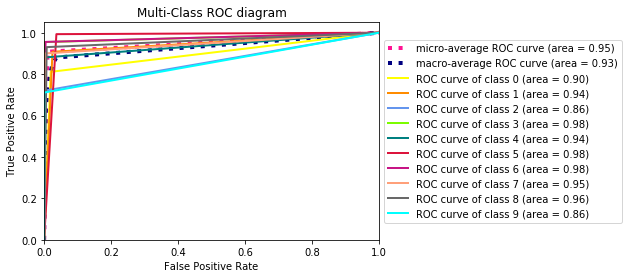

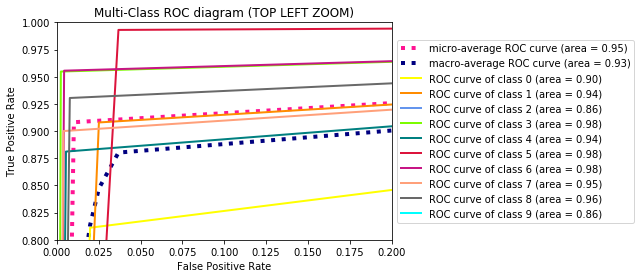

In [100]:
# plot ROC the curve
roc.plotROC(y_test,predictions)

## 1% Validation Accuracy

In [83]:
# define a new model which takes a min_delta of 0.01 which equates to a 1% change in the model
model9 = Sequential()

In [84]:
model9.add(Dense(512, activation='relu', input_shape=(784,)))
model9.add(Dense(512, activation='relu'))
model9.add(Dense(10, activation='softmax'))

In [85]:
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=0.01)

In [86]:
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'],)

In [87]:
model9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_24 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [88]:
Activation2 = model9.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test), callbacks=[es])

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 3s 271us/step - loss: 0.8408 - accuracy: 0.7355 - val_loss: 0.5549 - val_accuracy: 0.8072
Epoch 2/20
12660/12660 [==============================] - 3s 253us/step - loss: 0.3774 - accuracy: 0.8781 - val_loss: 0.6042 - val_accuracy: 0.8374
Epoch 3/20
12660/12660 [==============================] - 3s 250us/step - loss: 0.2837 - accuracy: 0.9095 - val_loss: 0.4397 - val_accuracy: 0.8698
Epoch 4/20
12660/12660 [==============================] - 3s 264us/step - loss: 0.2369 - accuracy: 0.9242 - val_loss: 0.3976 - val_accuracy: 0.8813
Epoch 5/20
12660/12660 [==============================] - 3s 250us/step - loss: 0.1759 - accuracy: 0.9423 - val_loss: 0.4180 - val_accuracy: 0.8894


In [119]:
# Evaluate function returns the Loss and Accuracy of the FINAL model returned after the last Epoch rather than the best model discovered during the training
score = model9.evaluate(x_test, y_test) 

4170/4170 [==============================] - 0s 68us/step


In [120]:
score

[0.4179669869353445, 0.8894484639167786]

Text(0, 0.5, 'Accuracy')

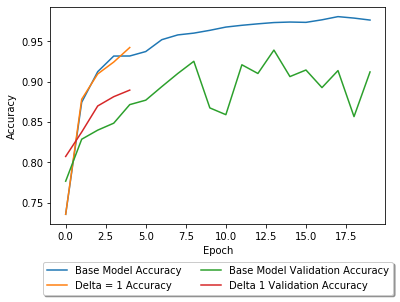

In [89]:
plt.plot(Base_Model.history['accuracy'], label='Base Model Accuracy')
plt.plot(Activation2.history['accuracy'], label='Delta = 1 Accuracy')
plt.plot(Base_Model.history['val_accuracy'], label='Base Model Validation Accuracy')
plt.plot(Activation2.history['val_accuracy'], label='Delta 1 Validation Accuracy')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

In [90]:
# have the trained model predict the test set (needed to create heat maps and classification reports)
predictions = model9.predict_classes(x_test, batch_size=10)

In [91]:
print(classification_report(rounded_labels,predictions))

              precision    recall  f1-score   support

           0       0.89      0.51      0.64       450
           1       0.72      0.96      0.82       630
           2       0.98      0.63      0.77       150
           3       0.98      0.94      0.96       420
           4       0.89      0.97      0.93       690
           5       0.97      0.98      0.98       720
           6       0.90      0.95      0.93       270
           7       0.59      0.82      0.69        60
           8       0.97      0.90      0.94       690
           9       0.96      0.89      0.92        90

    accuracy                           0.89      4170
   macro avg       0.89      0.86      0.86      4170
weighted avg       0.90      0.89      0.89      4170



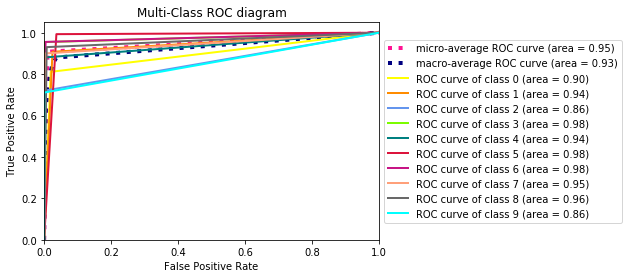

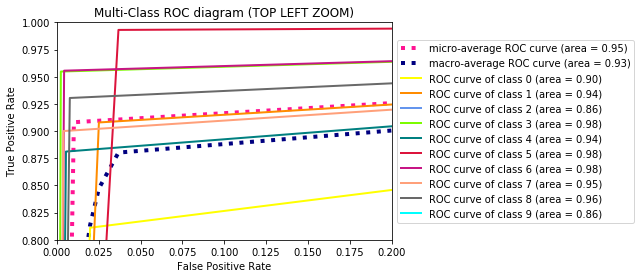

In [101]:
# plot ROC the curve
roc.plotROC(y_test,predictions)